## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results,on="Mouse ID",how = "outer")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_study.shape

(1893, 8)

In [3]:
mouse_study["Mouse ID"].value_counts()

g989    13
e213    10
a411    10
a897    10
w914    10
        ..
b447     1
x336     1
n482     1
o848     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Sort data by tumor volume
mouse_study = mouse_study.sort_values(["Tumor Volume (mm3)"], ascending = True)
mouse_study_df = mouse_study.reset_index(drop = True)
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,k403,Ramicane,Male,21,16,40,24.365505,1
3,s185,Capomulin,Female,3,17,40,25.472143,1
4,k403,Ramicane,Male,21,16,35,26.546993,1


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
statistics_calcs = ["mean","median","var","std","sem"]
mouse_study_summary = mouse_study_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(statistics_calcs)

# Rename columns
mouse_study_stats = mouse_study_summary.rename(columns = {"mean":"Mean",
                                                          "median": "Median",
                                                          "var":"Variance",
                                                          "std":"Standard Deviation",
                                                          "sem":"SEM"})
mouse_study_stats

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.322552  50.854632  42.351070           6.507770   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.512884  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar plots

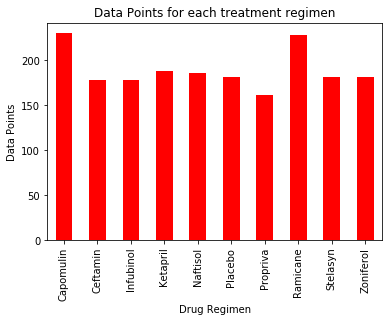

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Determine data points
mouse_points = mouse_study_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

# Generate the bar plot
mouse_points.plot(kind = "bar", facecolor = "red")
plt.title("Data Points for each treatment regimen")
plt.ylabel("Data Points")
plt.xlabel("Drug Regimen")
plt.show()

In [7]:
mouse_bar = pd.DataFrame(mouse_points)
mouse_bar

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


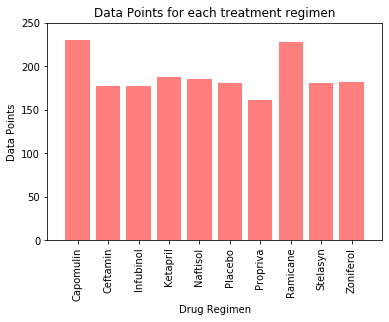

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Dependencies
import numpy as np

# Define x axis
x_axis = np.arange(len(mouse_bar))

tick_locations = [x for x in x_axis]

new_index = mouse_bar.reset_index()

plt.bar(x_axis, mouse_bar["Mouse ID"], color = "r", alpha = 0.5)
plt.xticks(tick_locations, new_index["Drug Regimen"], rotation = "vertical")
plt.xlim(-1,len(x_axis))
plt.ylim(0,max(mouse_bar["Mouse ID"])+20)
plt.title("Data Points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()

## Pie plots

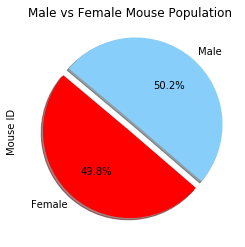

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = mouse_metadata.groupby(["Sex"]).count()

size = gender_df["Mouse ID"]
size

colors = ["red", "lightskyblue"]
explode = (0,0.1)
pie1 = gender_df["Mouse ID"].plot.pie(y="sizes",explode = explode, autopct="%1.1f%%",startangle=140, shadow = True, colors = colors)
plt.title("Male vs Female Mouse Population")

plt.show()

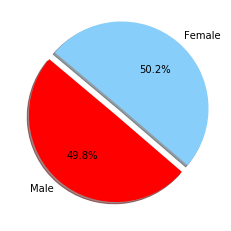

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
colors = ["red", "lightskyblue"]
explode = (0,0.1)
plt.pie(size,labels=labels,autopct="%1.1f%%",startangle=140,colors=colors,explode=explode,shadow=True)
plt.show()

## Quartiles, outliers and boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Select the top treatments
capo = mouse_study.loc[mouse_study["Drug Regimen"]=="Capomulin",:]
rami = mouse_study.loc[mouse_study["Drug Regimen"]=="Ramicane",:]
infu = mouse_study.loc[mouse_study["Drug Regimen"]=="Infubinol",:]
cefta = mouse_study.loc[mouse_study["Drug Regimen"]=="Ceftamin",:]

capo.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
28,x401,Capomulin,Female,16,15,40,28.167397,0
17,s185,Capomulin,Female,3,17,35,28.328531,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


In [15]:
# Final tumor volume of each mouse in Capomulin Treatment

capo_vol = capo.groupby("Mouse ID").max()["Timepoint"]
capo_vol_df = pd.DataFrame(capo_vol)
capo_merge = pd.merge(capo_vol_df,mouse_study,on=("Mouse ID","Timepoint"), how="left")
capo_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

capo_quartiles = capo_merge["Tumor Volume (mm3)"]

quartiles = capo_quartiles.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# print(f"The lower quartile of tumor volume is: {lowerq1}")
# print(f"The upper quartile of tumor volume is: {upperq1}")
# print(f"The interquartile range of tumor volume is: {iqr1}")
# print(f"The the median of tumor volume is: {quartiles1[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The potential values for outliers in Capomulin treatment are below {lower_bound} and above {upper_bound}")

The potential values for outliers in Capomulin treatment are below 20.70456164999999 and above 51.83201549


In [17]:
# Final tumor volume of each mouse in Ramicane Treatment

rami_vol = rami.groupby("Mouse ID").max()["Timepoint"]
rami_vol_df = pd.DataFrame(rami_vol)
rami_merge = pd.merge(rami_vol_df,mouse_study,on=("Mouse ID","Timepoint"), how="left")
rami_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

rami_quartiles = rami_merge["Tumor Volume (mm3)"]

quartiles = rami_quartiles.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The potential values for outliers in Ramicane treatment are below {lower_bound} and above {upper_bound}")

The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
The potential values for outliers in Ramicane treatment are below 17.912664470000003 and above 54.30681135


In [19]:
# Final tumor volume of each mouse in Infubinol Treatment

infu_vol = infu.groupby("Mouse ID").max()["Timepoint"]
infu_vol_df = pd.DataFrame(infu_vol)
infu_merge = pd.merge(infu_vol_df,mouse_study,on=("Mouse ID","Timepoint"), how="left")
infu_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

infu_quartiles = infu_merge["Tumor Volume (mm3)"]

quartiles = infu_quartiles.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor Volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The potential values for outliers in Infubinol treatment are below {lower_bound} and above {upper_bound}")

The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor Volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
The potential values for outliers in Infubinol treatment are below 36.83290494999999 and above 82.74144559000001


In [21]:
# Final tumor volume of each mouse in Ceftamin Treatment

cefta_vol = cefta.groupby("Mouse ID").max()["Timepoint"]
cefta_vol_df = pd.DataFrame(cefta_vol)
cefta_merge = pd.merge(cefta_vol_df,mouse_study,on=("Mouse ID","Timepoint"), how="left")
cefta_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

cefta_quartiles = cefta_merge["Tumor Volume (mm3)"]

quartiles = cefta_quartiles.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor Volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The potential values for outliers in Ceftamin treatment are below {lower_bound} and above {upper_bound}")

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor Volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
The potential values for outliers in Ceftamin treatment are below 25.355449580000002 and above 87.66645829999999


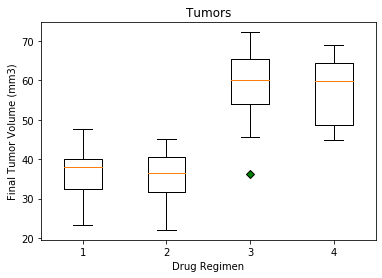

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [capo_quartiles,rami_quartiles,infu_quartiles,cefta_quartiles]
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title("Tumors")
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data,flierprops=green_diamond)
plt.show()

## Line and scatter plots

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_study["Mouse ID"].unique()

# Selected mouse ID = l897

one_mouse = capo.loc[capo["Mouse ID"]=="l897"]
one_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
280,l897,Capomulin,Male,17,19,35,37.682767,1
281,l897,Capomulin,Male,17,19,40,38.343902,1
282,l897,Capomulin,Male,17,19,45,38.846876,1
279,l897,Capomulin,Male,17,19,30,39.352792,1
276,l897,Capomulin,Male,17,19,15,44.061521,0


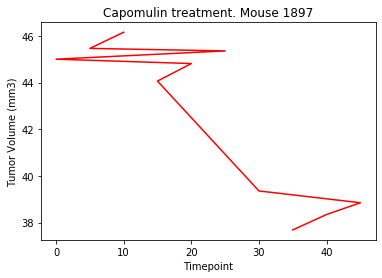

In [26]:
x_axis = one_mouse["Timepoint"]
tumor_vol = one_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis, tumor_vol,"r-")
plt.title("Capomulin treatment. Mouse 1897")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

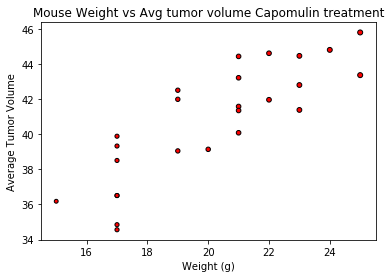

In [35]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_average = capo.groupby(["Mouse ID"]).mean()
x_axis = capo_average["Weight (g)"]
avg_tumor_vol = capo_average["Tumor Volume (mm3)"]

plt.scatter(x_axis,avg_tumor_vol,marker="o",color="red",edgecolors="black",s=x_axis)
plt.title("Mouse Weight vs Avg tumor volume Capomulin treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()


The correlation coefficient between mouse weight and average tumor volume is 0.8419363424694724, which represents a strong correlation.


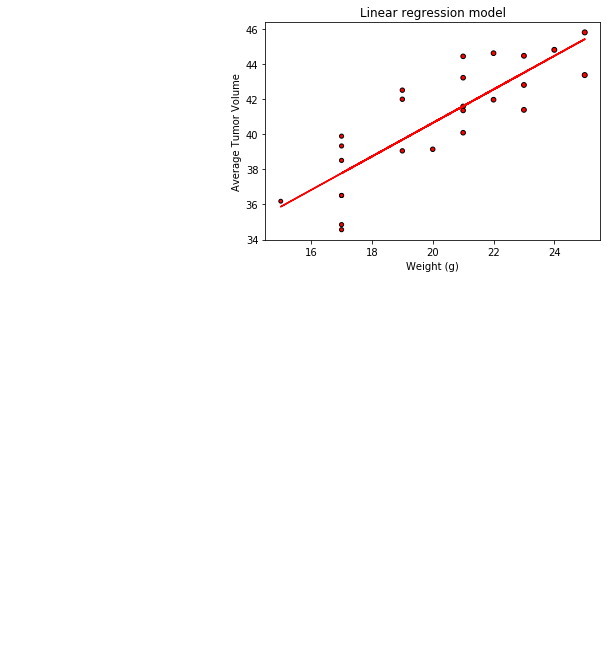

In [51]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

#Get correlation
correlation_coef = st.pearsonr(x_axis,avg_tumor_vol)[0]
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation_coef}, which represents a strong correlation.")

#Add linear regression

x_axis = capo_average["Weight (g)"]
avg_tumor_vol = capo_average["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis,avg_tumor_vol)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,avg_tumor_vol,marker="o",color="red",edgecolors="black",s=x_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Linear regression model")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()

      